## Задание 7.1
Пусть X — номер этажа, на который хочет поехать человек из подземного гаража («нулевого этажа») в многоквартирном пятидесятиэтажном доме, используя лифт «для жильцов», который ведёт к этажам с 10 по 19 и с 35 по 44 включительно. Для случайной величины X найдите её дисперсию. Если ответ — дробное число, в качестве разделителя используйте точку.

In [4]:
# дисперсия - var
def var(X):
    Xmean = sum(X) / len(X)
    var = sum([(x - Xmean)**2 for x in X]) / len(X)
    return var
    
# этажи
X = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44]

var(X)

164.5

## Задание 7.2  
На пути движения автомобиля установлено бесконечно много светофоров. Порядок переключения светофоров: зелёный свет горит 27 секунд, жёлтый — 3 сек., красный — 17 сек., жёлтый — 3 сек., затем снова зелёный и т. д. Для случайной величины X — числа светофоров, пройденных автомобилем до первой остановки, найдите её дисперсию. Если ответ — дробное число, в качестве разделителя используйте точку.

In [3]:
import scipy.stats as stats
var = stats.geom.stats(0.4, moments='v')
round(var, 2)

3.75

## Задание 7.3  
Число атак истребителей, которым может подвергнуться бомбардировщик над территорией противника, есть случайная величина X, распределённая по закону Пуассона с математическим ожиданием M = 4. Каждая атака с вероятностью 0.2 заканчивается поражением бомбардировщика. Определите вероятность поражения бомбардировщика в результате двух атак. Ответ округлите до трёх знаков после точки, используемой в качестве разделителя.

In [5]:
# pmf - (probability mass function) — это функция, которая возвращает вероятность того, что случайная величина примет определённое значение.
# Закон Пуассона
# Вероятность поражения в результате двух атак (<=2): 0.8 * 0.2 (не поразил, поразил) + 0.2 (поражен с первой атаки)
round(stats.poisson.pmf(k=2, mu=4) * (0.2 + 0.2*0.8), 3)

0.053

## Задания 7.4 - 7.12

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm, expon, uniform, binom, hypergeom

In [2]:
df = pd.read_csv('data.csv')
df

,column_1,column_2,column_3,column_4,column_5,column_6
0,27.596143,218,28,-20.746787,15.840945,48
1,33.838907,231,25,-6.419991,19.347807,42
2,29.024062,226,38,4.472388,15.770979,44
3,28.462851,227,31,-9.647105,15.352260,41
4,34.734580,232,24,19.402531,15.060842,50
...,...,...,...,...,...,...
9995,26.404022,224,28,32.065897,20.925720,43
9996,34.087082,218,29,-5.273347,19.761991,51
9997,31.047074,234,29,8.477591,24.571603,43
9998,29.002059,216,31,7.320368,15.041266,42


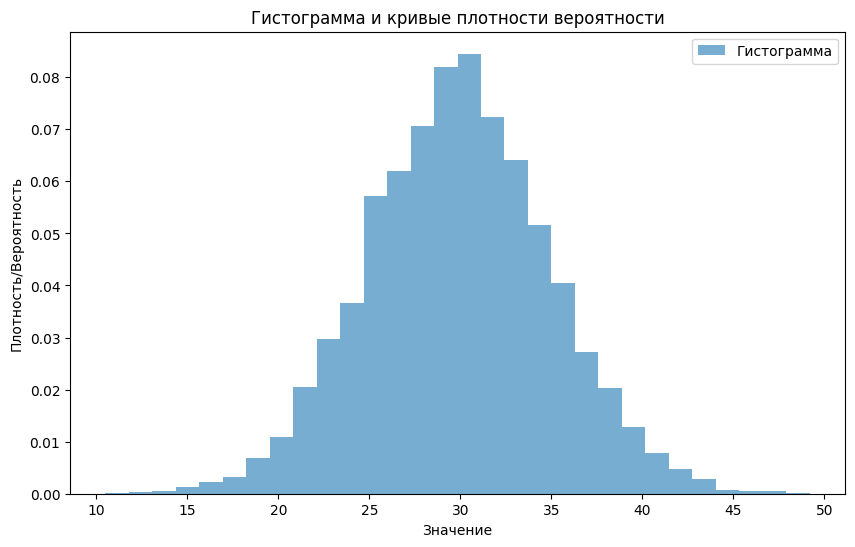

Дисперсия данных в колонке 'column_1': 25


In [14]:
data = df['column_1']

# Визуальный анализ: гистограмма и кривая плотности
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Гистограмма')

# # Аппроксимация различными распределениями
# distributions = [expon, norm, uniform, binom, hypergeom]
# for dist in distributions:
#     try:
#         if dist == binom:
#             # Биномиальное распределение требует n и p
#             n = len(data)  # Это очень грубое приближение
#             p = np.mean(data) / n
#             params = (n, p)
#             x = np.arange(0, n + 1)
#             pdf_fitted = binom.pmf(x, *params)
#             plt.plot(x, pdf_fitted, label=f'{dist.name}', drawstyle='steps-mid')
#         elif dist == hypergeom:
#             # Гипергеометрическое распределение требует N, K, n
#             N = len(data) # это очень грубое приближение
#             K = int(np.mean(data) ) # это очень грубое приближение
#             n = len(data) # это очень грубое приближение

#             params = (N,K,n)

#             x = np.arange(0, n + 1)
#             pdf_fitted = hypergeom.pmf(x, *params)
#             plt.plot(x, pdf_fitted, label=f'{dist.name}', drawstyle='steps-mid')
#         elif dist == uniform:
#             # Равномерное распределение требует loc и scale
#             params = uniform.fit(data)
#             x = np.linspace(params[0], params[0] + params[1], 100)
#             pdf_fitted = uniform.pdf(x, *params)
#             plt.plot(x, pdf_fitted, label=f'{dist.name}')
#         else:
#             # Другие распределения (нормальное, экспоненциальное)
#             params = dist.fit(data)
#             x = np.sort(data)
#             pdf_fitted = dist.pdf(x, *params)
#             plt.plot(x, pdf_fitted, label=f'{dist.name}')

#     except ValueError as e:
#         print(f"Ошибка при аппроксимации {dist.name}: {e}")
#         continue  # Переходим к следующему распределению, если возникла ошибка


plt.xlabel('Значение')
plt.ylabel('Плотность/Вероятность')
plt.title('Гистограмма и кривые плотности вероятности')
plt.legend()
plt.show()

# поиск дисперсии для данных из первой колонки
# Вычисление дисперсии с помощью NumPy
variance = np.var(data, ddof=1) # ddof=1 для несмещенной оценки дисперсии
# Округление до целого числа
print(f"Дисперсия данных в колонке 'column_1': {int(round(variance))}")

в 1 колонке распределение нормальное

(array([3.89610390e-05, 0.00000000e+00, 1.55844156e-04, 1.55844156e-04,
        7.79220779e-04, 2.10389610e-03, 2.22077922e-03, 6.19480519e-03,
        9.93506494e-03, 1.14935065e-02, 2.17012987e-02, 2.01038961e-02,
        3.66233766e-02, 2.89480519e-02, 4.63246753e-02, 4.94805195e-02,
        3.06233766e-02, 3.74025974e-02, 2.15844156e-02, 2.47402597e-02,
        1.13376623e-02, 1.30909091e-02, 7.12987013e-03, 2.84415584e-03,
        2.37662338e-03, 1.01298701e-03, 8.18181818e-04, 2.33766234e-04,
        1.16883117e-04, 3.89610390e-05]),
 array([181.        , 183.56666667, 186.13333333, 188.7       ,
        191.26666667, 193.83333333, 196.4       , 198.96666667,
        201.53333333, 204.1       , 206.66666667, 209.23333333,
        211.8       , 214.36666667, 216.93333333, 219.5       ,
        222.06666667, 224.63333333, 227.2       , 229.76666667,
        232.33333333, 234.9       , 237.46666667, 240.03333333,
        242.6       , 245.16666667, 247.73333333, 250.3       ,
      

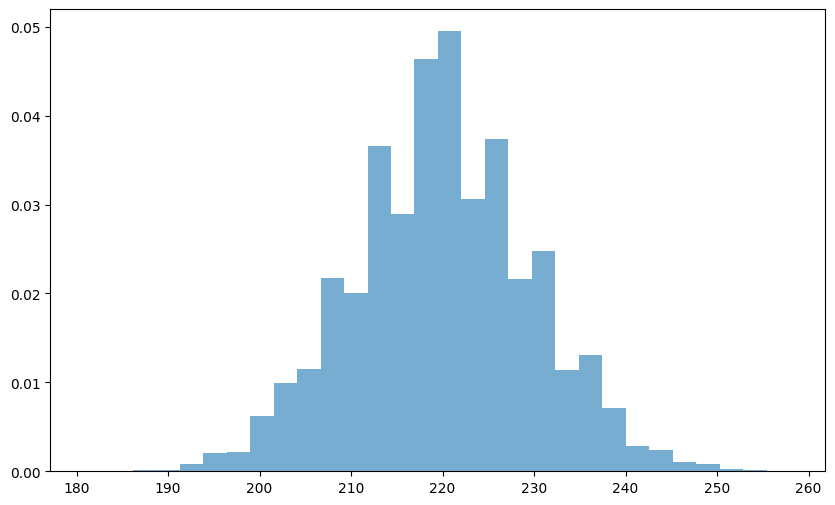

In [9]:
data = df['column_2']

# Визуальный анализ: гистограмма и кривая плотности
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Гистограмма')

во 2 колонке распределение биномиальное

среднее значение (математическое ожидание) данных в колонке 'column_3': 30


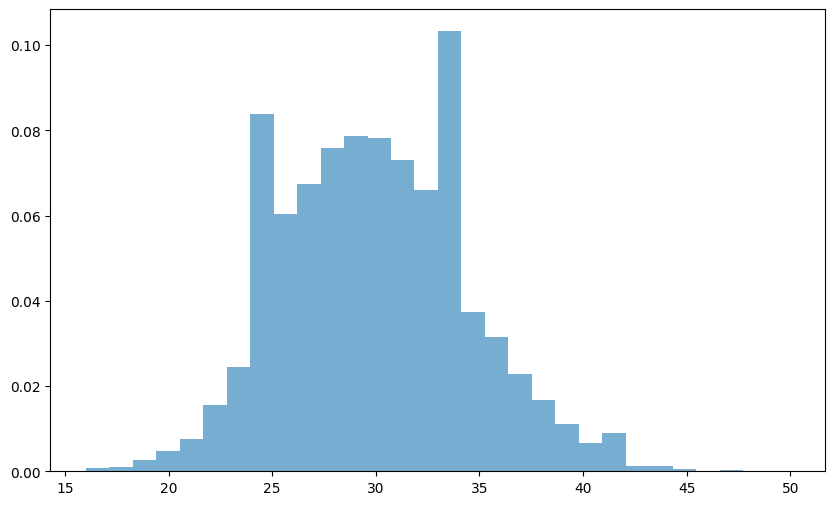

In [16]:
data = df['column_3']

# Визуальный анализ: гистограмма и кривая плотности
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Гистограмма')
# найти среднее значение (мат ожидание) для данных из третьей колонки
# распределение пуассона
mean_value = np.mean(data)
# Округление до целого числа
print(f"среднее значение (математическое ожидание) данных в колонке 'column_3': {int(round(mean_value))}")

в 3 колонке распределение Пуассона

(array([1.53183024e-05, 1.53183024e-05, 1.53183024e-05, 3.06366049e-05,
        1.53183024e-05, 9.19098146e-05, 1.83819629e-04, 3.82957561e-04,
        8.27188331e-04, 1.31737401e-03, 2.80324934e-03, 5.51458887e-03,
        9.81903186e-03, 2.04039788e-02, 3.69324272e-02, 3.51708224e-02,
        1.95614722e-02, 9.78839525e-03, 5.00908489e-03, 2.51220160e-03,
        1.31737401e-03, 6.74005307e-04, 3.67639258e-04, 1.68501327e-04,
        1.53183024e-04, 3.06366049e-05, 3.06366049e-05, 1.53183024e-05,
        0.00000000e+00, 1.53183024e-05]),
 array([-87.85191335, -81.32377484, -74.79563633, -68.26749782,
        -61.73935931, -55.2112208 , -48.68308229, -42.15494377,
        -35.62680526, -29.09866675, -22.57052824, -16.04238973,
         -9.51425122,  -2.98611271,   3.5420258 ,  10.07016431,
         16.59830282,  23.12644134,  29.65457985,  36.18271836,
         42.71085687,  49.23899538,  55.76713389,  62.2952724 ,
         68.82341091,  75.35154942,  81.87968794,  88.40782645,
      

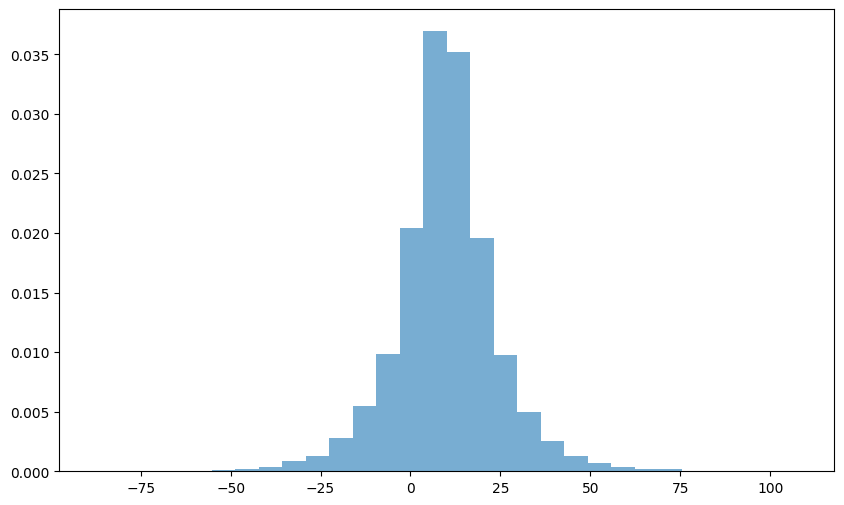

In [11]:
data = df['column_4']

# Визуальный анализ: гистограмма и кривая плотности
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Гистограмма')

в 4 колонке распределение Лапласа

(array([0.10290687, 0.09390627, 0.09390627, 0.10140677, 0.10290687,
        0.09090607, 0.09180613, 0.10890727, 0.09630643, 0.09840657,
        0.09930663, 0.10500701, 0.09810655, 0.10530703, 0.10140677,
        0.09930663, 0.10290687, 0.10830723, 0.10170679, 0.09420629,
        0.09210615, 0.09630643, 0.09900661, 0.10260685, 0.09840657,
        0.10530703, 0.10200681, 0.09240617, 0.10110675, 0.11400761]),
 array([15.00009204, 15.33340313, 15.66671422, 16.00002532, 16.33333641,
        16.6666475 , 16.99995859, 17.33326969, 17.66658078, 17.99989187,
        18.33320297, 18.66651406, 18.99982515, 19.33313624, 19.66644734,
        19.99975843, 20.33306952, 20.66638061, 20.99969171, 21.3330028 ,
        21.66631389, 21.99962499, 22.33293608, 22.66624717, 22.99955826,
        23.33286936, 23.66618045, 23.99949154, 24.33280264, 24.66611373,
        24.99942482]),
 <BarContainer object of 30 artists>)

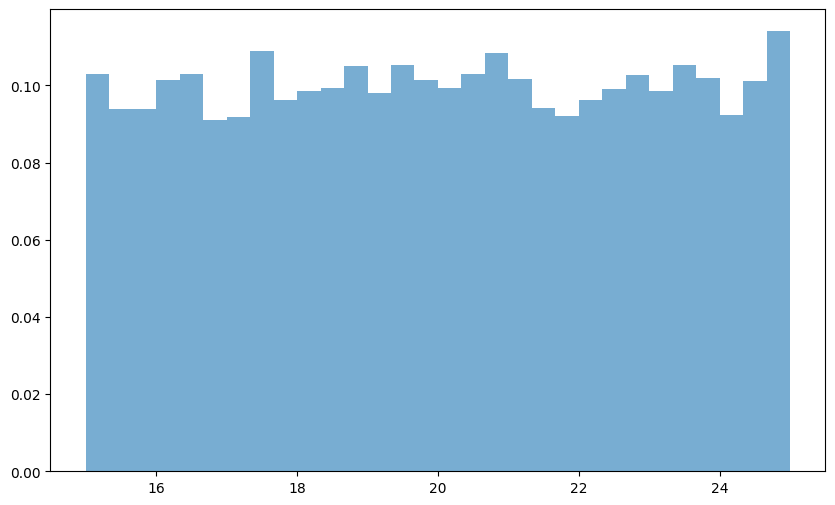

In [12]:
data = df['column_5']

# Визуальный анализ: гистограмма и кривая плотности
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Гистограмма')

в 5 колонке распределение равномерное

медиана для данных в колонке 'column_6': 43


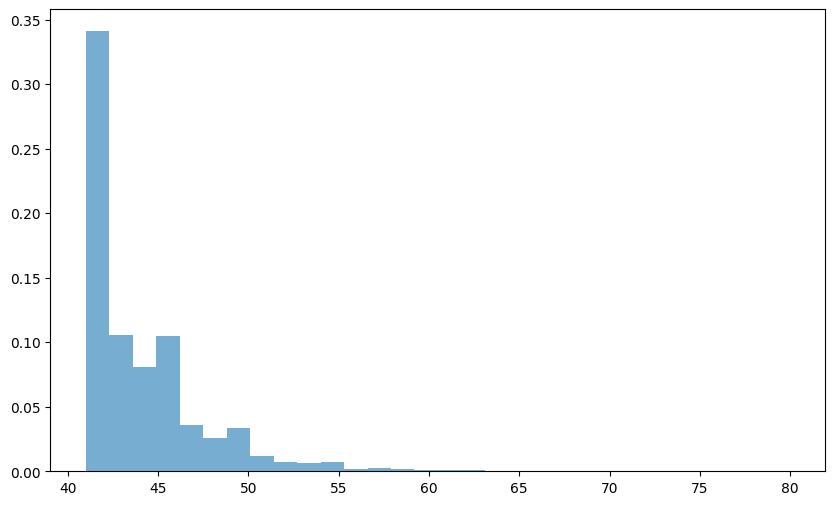

In [18]:
data = df['column_6']

# Визуальный анализ: гистограмма и кривая плотности
plt.figure(figsize=(10, 6))
plt.hist(data, bins=30, density=True, alpha=0.6, label='Гистограмма')

# медиану для данных 6 колонки
med = np.median(data)
# Округление до целого числа
print(f"медиана для данных в колонке 'column_6': {int(round(med))}")

в 6 колонке распределение геометрическое